In [1]:
pip install pandas pyreadstat matplotlib seaborn scipy numpy

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.4 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.8/2.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 3.4 MB/s eta 0:00:00

  Attempting uninstall: narwhals

    Found existing installation: narwhals 1.31.0

   ---------------------------------------- 0/2 [narwhals]
    Uninstalling narwhals-1.31.0:
   ---------------------------------------- 0/2 [narwhals]
      Successfully uninstalled narwhals-1.31.0
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwha

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


In [2]:
pip install  pyreadstat matplotlib 

Note: you may need to restart the kernel to use updated packages.


قراءة البيانات من ملف SPSS...

✓ تم قراءة البيانات بنجاح!
عدد المشاهدات: 26
عدد المتغيرات: 7

أسماء المتغيرات: ['السنة', 'Y', 'time', 'x1', 'x2', 'Y_1', 'Y_2']

الإحصاءات الوصفية للبيانات
             السنة             Y       time         x1         x2  \
count    26.000000     26.000000  26.000000  26.000000  26.000000   
mean   2011.500000   6377.168162  13.500000   0.439615  54.886136   
std       7.648529   3961.621820   7.648529   0.130258   7.060958   
min    1999.000000    237.400000   1.000000   0.247598  45.000000   
25%    2005.250000   4345.000000   7.250000   0.317896  50.000000   
50%    2011.500000   6208.300000  13.500000   0.457095  52.318182   
75%    2017.750000   8792.825000  19.750000   0.513716  60.000000   
max    2024.000000  15200.000000  26.000000   0.721000  69.000000   

                Y_1           Y_2  
count     25.000000     24.000000  
mean    6024.254888   5758.561342  
std     3602.112401   3420.203996  
min      237.400000    237.400000  
25%     42

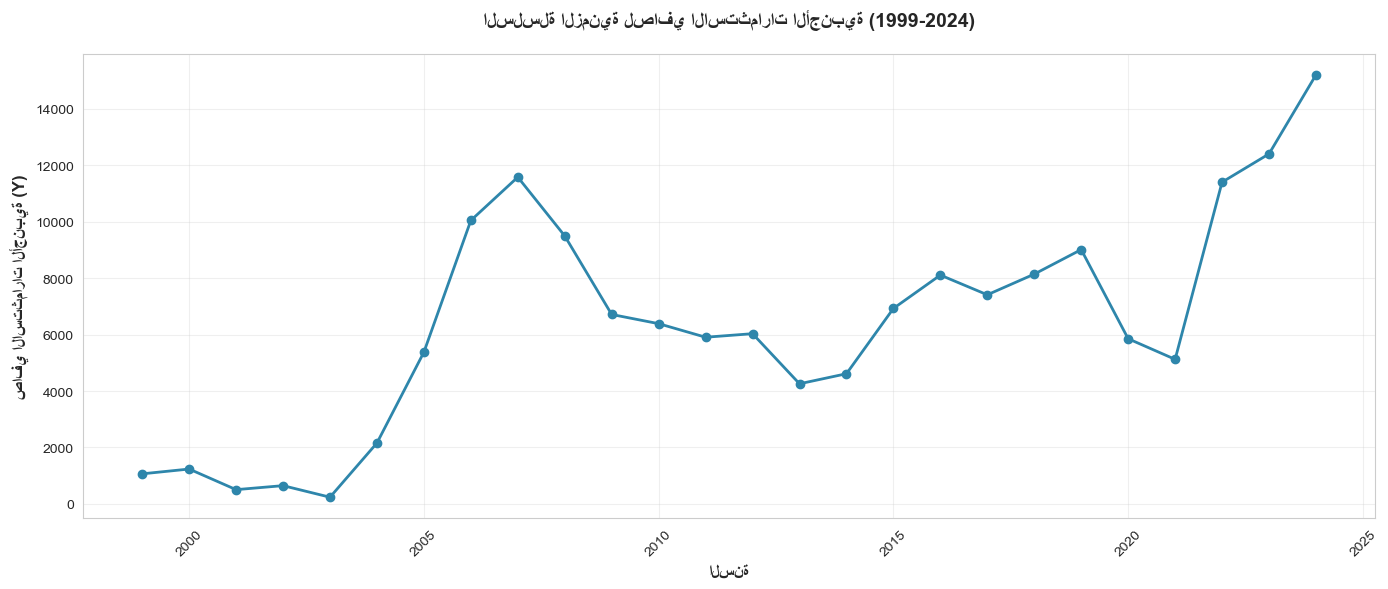

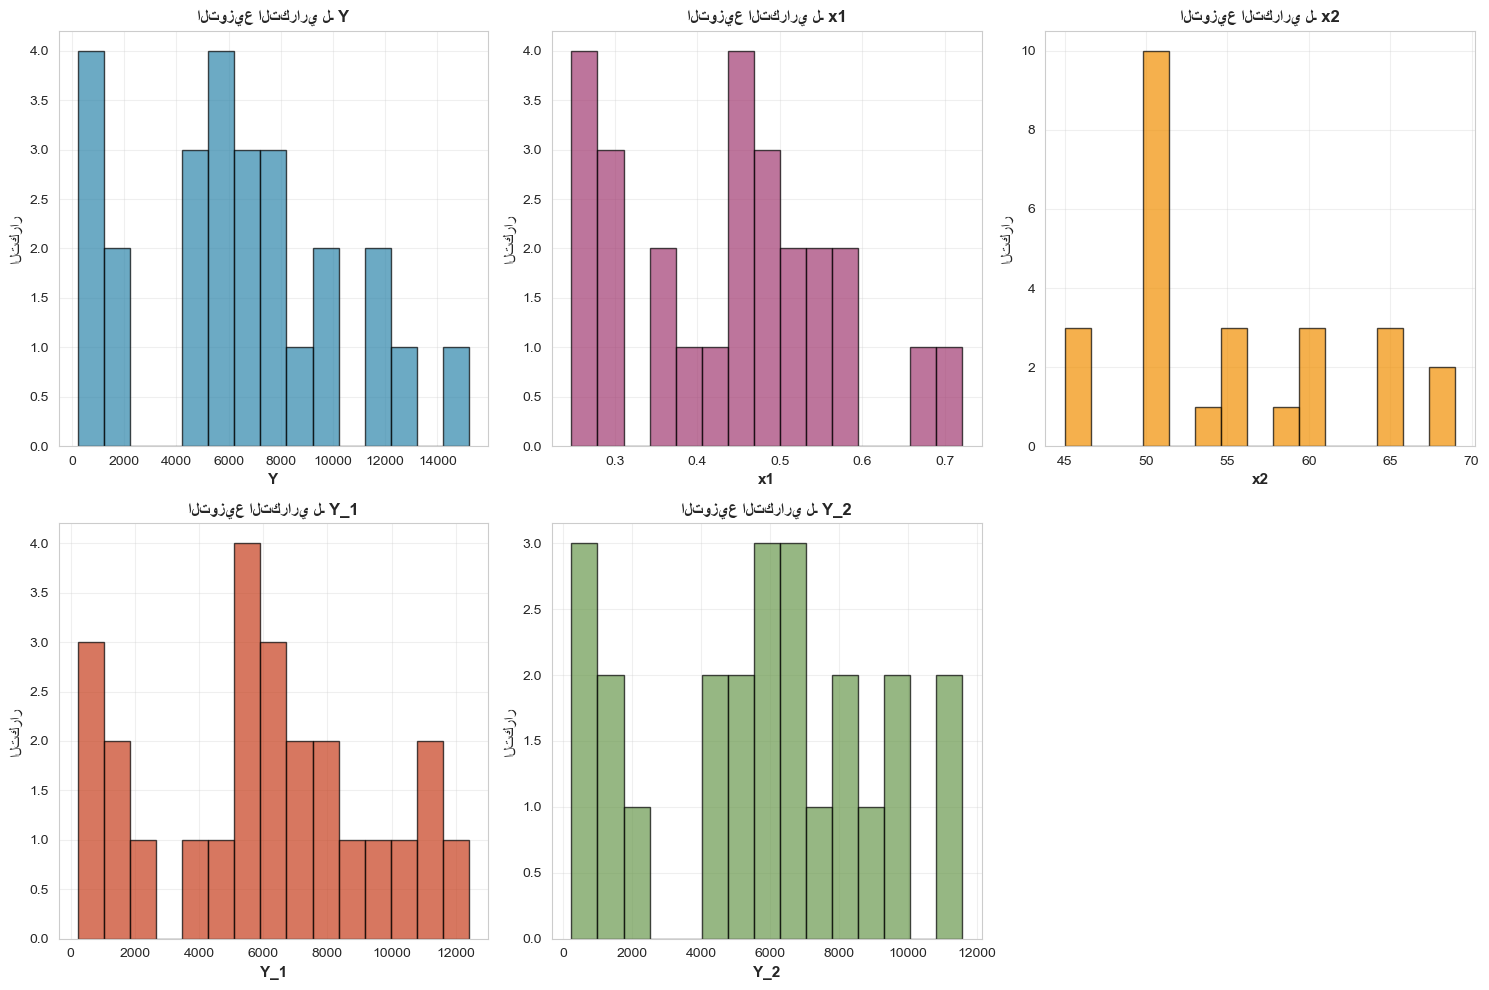

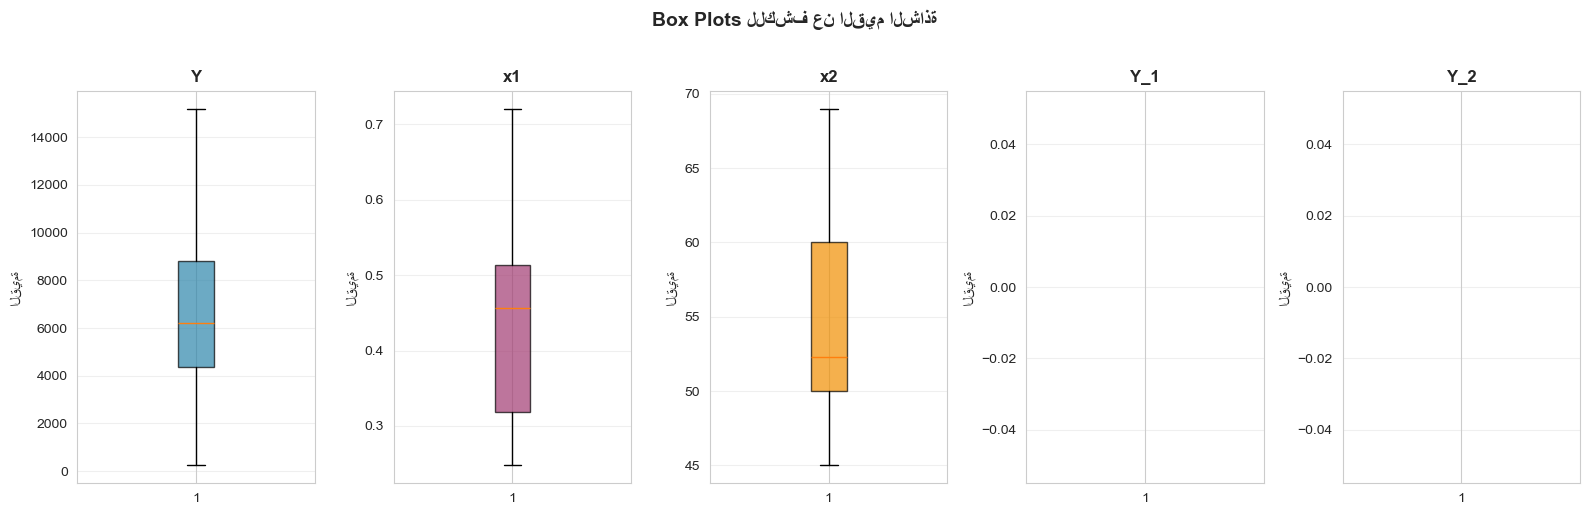

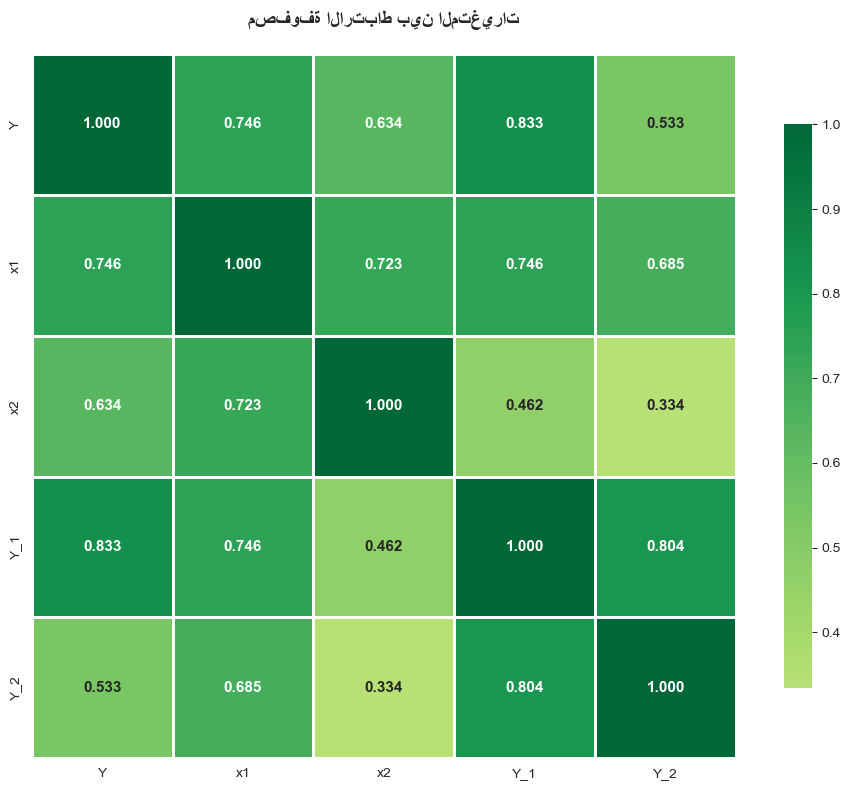

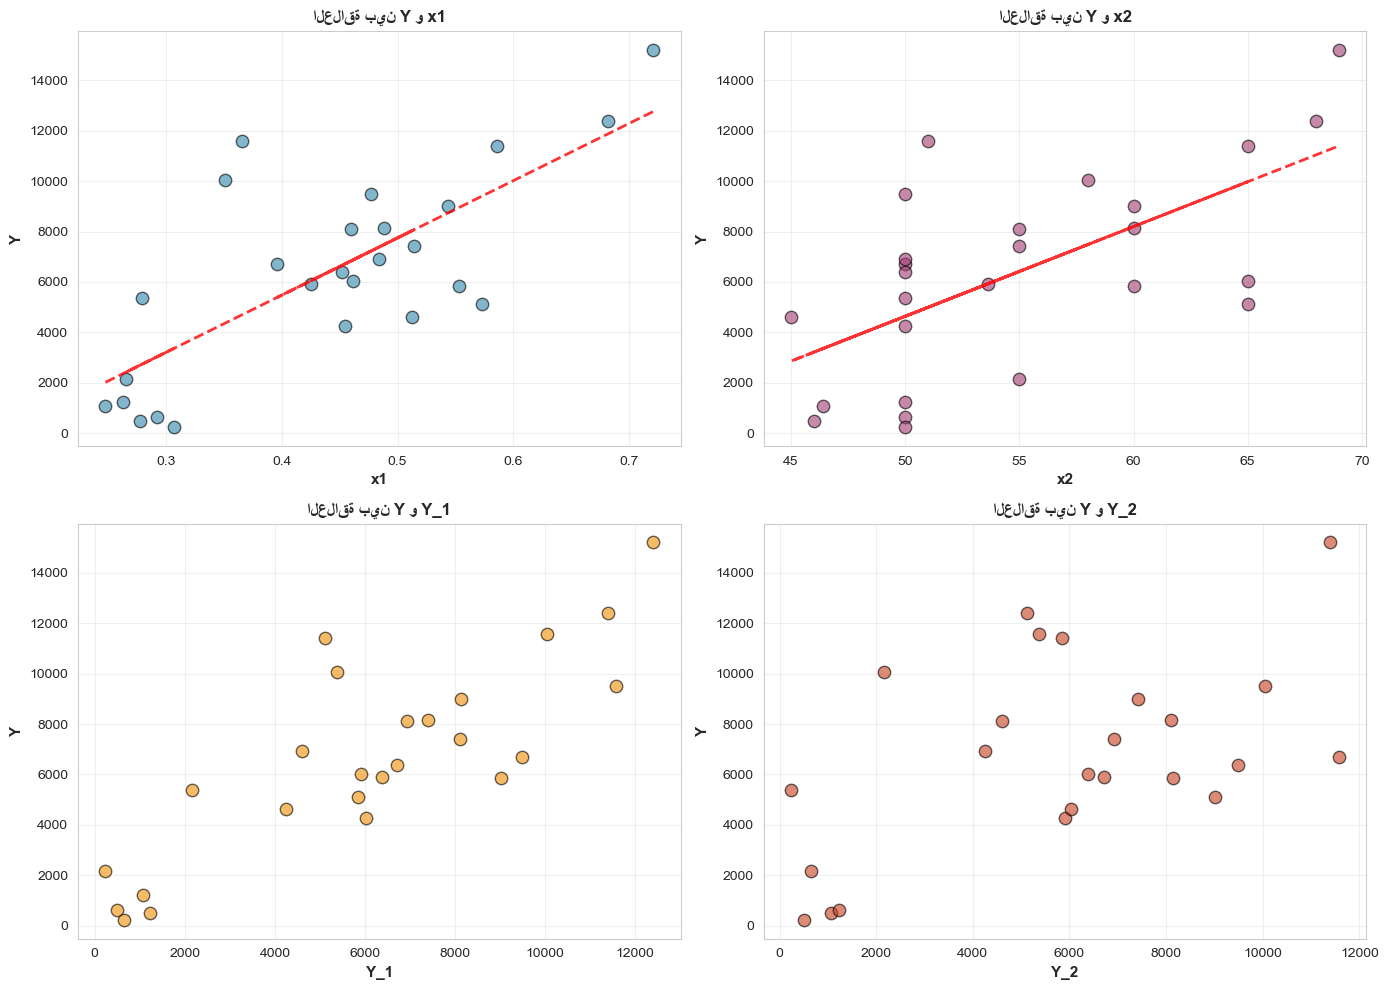

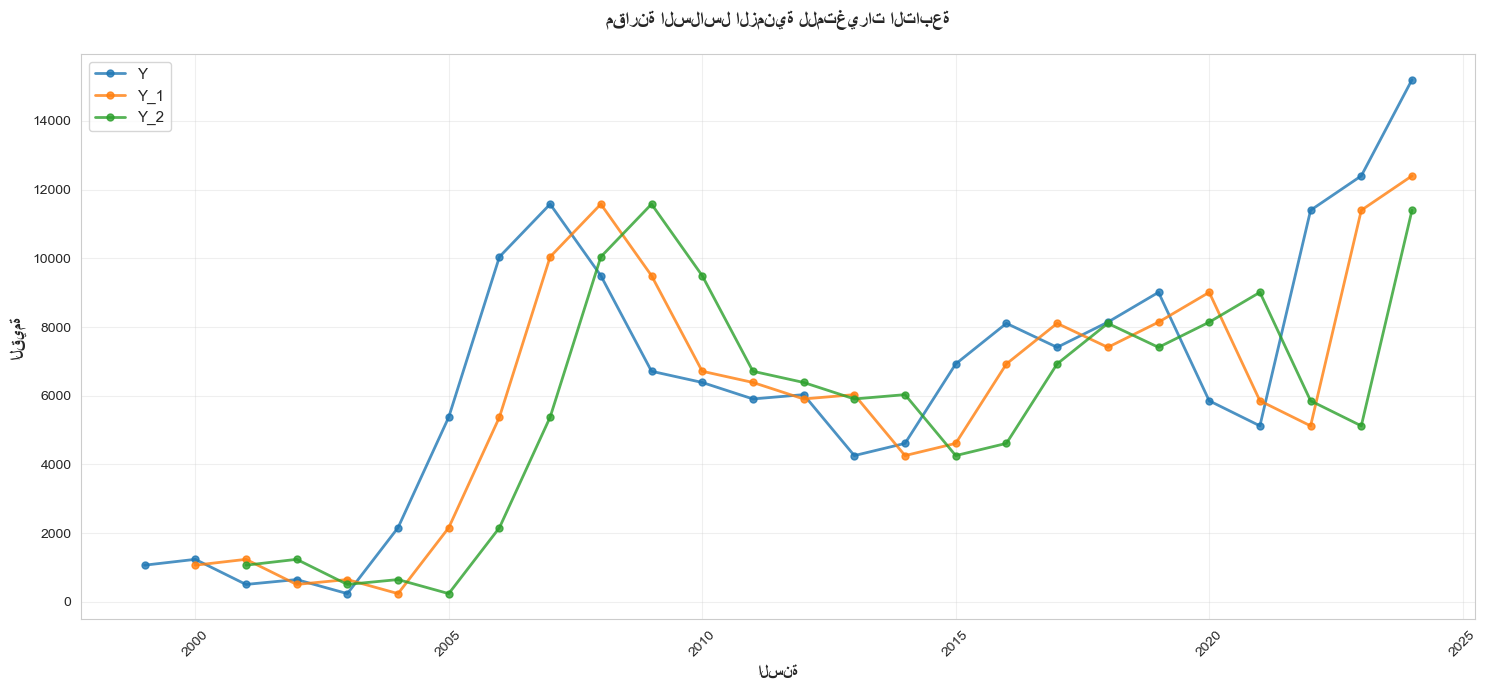


اختبار التوزيع الطبيعي (Shapiro-Wilk Test)

Y:
  الإحصائية: 0.9660
  P-value: 0.5223
  ✓ البيانات تتبع التوزيع الطبيعي

x1:
  الإحصائية: 0.9525
  P-value: 0.2656
  ✓ البيانات تتبع التوزيع الطبيعي

x2:
  الإحصائية: 0.8956
  P-value: 0.0125
  ✗ البيانات لا تتبع التوزيع الطبيعي

معاملات الارتباط (Pearson)

الارتباط بين Y والمتغيرات الأخرى:
  Y vs x1: 0.7456 (p-value: 0.0000)
  Y vs x2: 0.6335 (p-value: 0.0005)
  Y vs Y_1: nan (p-value: nan)
  Y vs Y_2: nan (p-value: nan)

تم إنهاء التحليل بنجاح! ✓


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# تعيين الخطوط العربية للرسوم البيانية
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

# ======================================
# 1. قراءة البيانات من ملف SPSS
# ======================================
print("=" * 60)
print("قراءة البيانات من ملف SPSS...")
print("=" * 60)

# قراءة ملف SPSS
file_path = 'Desktop/data-time series.sav'
df = pd.read_spss(file_path)

print("\n✓ تم قراءة البيانات بنجاح!")
print(f"عدد المشاهدات: {len(df)}")
print(f"عدد المتغيرات: {len(df.columns)}")
print(f"\nأسماء المتغيرات: {list(df.columns)}")

# ======================================
# 2. عرض معلومات أساسية عن البيانات
# ======================================
print("\n" + "=" * 60)
print("الإحصاءات الوصفية للبيانات")
print("=" * 60)
print(df.describe())

print("\n" + "=" * 60)
print("أول 10 صفوف من البيانات")
print("=" * 60)
print(df.head(10))

# فحص القيم المفقودة
print("\n" + "=" * 60)
print("القيم المفقودة")
print("=" * 60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✓ لا توجد قيم مفقودة")

# ======================================
# 3. الرسوم البيانية الأساسية
# ======================================

# 3.1 السلسلة الزمنية للمتغير التابع Y
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['السنة'], df['Y'], marker='o', linewidth=2, markersize=6, color='#2E86AB')
ax.set_xlabel('السنة', fontsize=12, fontweight='bold')
ax.set_ylabel('صافي الاستثمارات الأجنبية (Y)', fontsize=12, fontweight='bold')
ax.set_title('السلسلة الزمنية لصافي الاستثمارات الأجنبية (1999-2024)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 التوزيع التكراري للمتغيرات
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
variables = ['Y', 'x1', 'x2', 'Y_1', 'Y_2']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[var], bins=15, color=colors[idx], alpha=0.7, edgecolor='black')
    axes[row, col].set_xlabel(var, fontsize=11, fontweight='bold')
    axes[row, col].set_ylabel('التكرار', fontsize=11)
    axes[row, col].set_title(f'التوزيع التكراري لـ {var}', fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

# حذف المحور الأخير الفارغ
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

# 3.3 Box Plots لاكتشاف القيم الشاذة
fig, axes = plt.subplots(1, 5, figsize=(16, 5))
for idx, var in enumerate(variables):
    bp = axes[idx].boxplot(df[var], patch_artist=True)
    bp['boxes'][0].set_facecolor(colors[idx])
    bp['boxes'][0].set_alpha(0.7)
    axes[idx].set_ylabel('القيمة', fontsize=10)
    axes[idx].set_title(var, fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Box Plots للكشف عن القيم الشاذة', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3.4 مصفوفة الارتباط (Correlation Matrix)
correlation_vars = ['Y', 'x1', 'x2', 'Y_1', 'Y_2']
corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'size': 11, 'weight': 'bold'})
plt.title('مصفوفة الارتباط بين المتغيرات', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3.5 Scatter Plots - العلاقة بين المتغيرات المستقلة والتابعة
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Y vs x1
axes[0, 0].scatter(df['x1'], df['Y'], alpha=0.6, s=80, color='#2E86AB', edgecolors='black')
axes[0, 0].set_xlabel('x1', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Y', fontsize=11, fontweight='bold')
axes[0, 0].set_title('العلاقة بين Y و x1', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# إضافة خط الانحدار
z = np.polyfit(df['x1'], df['Y'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['x1'], p(df['x1']), "r--", alpha=0.8, linewidth=2)

# Y vs x2
axes[0, 1].scatter(df['x2'], df['Y'], alpha=0.6, s=80, color='#A23B72', edgecolors='black')
axes[0, 1].set_xlabel('x2', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Y', fontsize=11, fontweight='bold')
axes[0, 1].set_title('العلاقة بين Y و x2', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

z = np.polyfit(df['x2'], df['Y'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['x2'], p(df['x2']), "r--", alpha=0.8, linewidth=2)

# Y vs Y_1
axes[1, 0].scatter(df['Y_1'], df['Y'], alpha=0.6, s=80, color='#F18F01', edgecolors='black')
axes[1, 0].set_xlabel('Y_1', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Y', fontsize=11, fontweight='bold')
axes[1, 0].set_title('العلاقة بين Y و Y_1', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Y vs Y_2
axes[1, 1].scatter(df['Y_2'], df['Y'], alpha=0.6, s=80, color='#C73E1D', edgecolors='black')
axes[1, 1].set_xlabel('Y_2', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Y', fontsize=11, fontweight='bold')
axes[1, 1].set_title('العلاقة بين Y و Y_2', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3.6 السلاسل الزمنية لجميع المتغيرات معاً
fig, ax = plt.subplots(figsize=(15, 7))
for idx, var in enumerate(['Y', 'Y_1', 'Y_2']):
    ax.plot(df['السنة'], df[var], marker='o', linewidth=2, 
            label=var, markersize=5, alpha=0.8)

ax.set_xlabel('السنة', fontsize=12, fontweight='bold')
ax.set_ylabel('القيمة', fontsize=12, fontweight='bold')
ax.set_title('مقارنة السلاسل الزمنية للمتغيرات التابعة', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ======================================
# 4. اختبار التوزيع الطبيعي
# ======================================
print("\n" + "=" * 60)
print("اختبار التوزيع الطبيعي (Shapiro-Wilk Test)")
print("=" * 60)

for var in ['Y', 'x1', 'x2']:
    stat, p_value = stats.shapiro(df[var])
    print(f"\n{var}:")
    print(f"  الإحصائية: {stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value > 0.05:
        print(f"  ✓ البيانات تتبع التوزيع الطبيعي")
    else:
        print(f"  ✗ البيانات لا تتبع التوزيع الطبيعي")

# ======================================
# 5. معاملات الارتباط
# ======================================
print("\n" + "=" * 60)
print("معاملات الارتباط (Pearson)")
print("=" * 60)
print("\nالارتباط بين Y والمتغيرات الأخرى:")
for var in ['x1', 'x2', 'Y_1', 'Y_2']:
    corr, p_val = stats.pearsonr(df['Y'], df[var])
    print(f"  Y vs {var}: {corr:.4f} (p-value: {p_val:.4f})")

print("\n" + "=" * 60)
print("تم إنهاء التحليل بنجاح! ✓")
print("=" * 60)

Reading Data from SPSS File...

Data loaded successfully!
Number of observations: 26
Number of variables: 7

Variable names: ['السنة', 'Y', 'time', 'x1', 'x2', 'Y_1', 'Y_2']

DESCRIPTIVE STATISTICS
             السنة             Y       time         x1         x2  \
count    26.000000     26.000000  26.000000  26.000000  26.000000   
mean   2011.500000   6377.168162  13.500000   0.439615  54.886136   
std       7.648529   3961.621820   7.648529   0.130258   7.060958   
min    1999.000000    237.400000   1.000000   0.247598  45.000000   
25%    2005.250000   4345.000000   7.250000   0.317896  50.000000   
50%    2011.500000   6208.300000  13.500000   0.457095  52.318182   
75%    2017.750000   8792.825000  19.750000   0.513716  60.000000   
max    2024.000000  15200.000000  26.000000   0.721000  69.000000   

                Y_1           Y_2  
count     25.000000     24.000000  
mean    6024.254888   5758.561342  
std     3602.112401   3420.203996  
min      237.400000    237.400000  


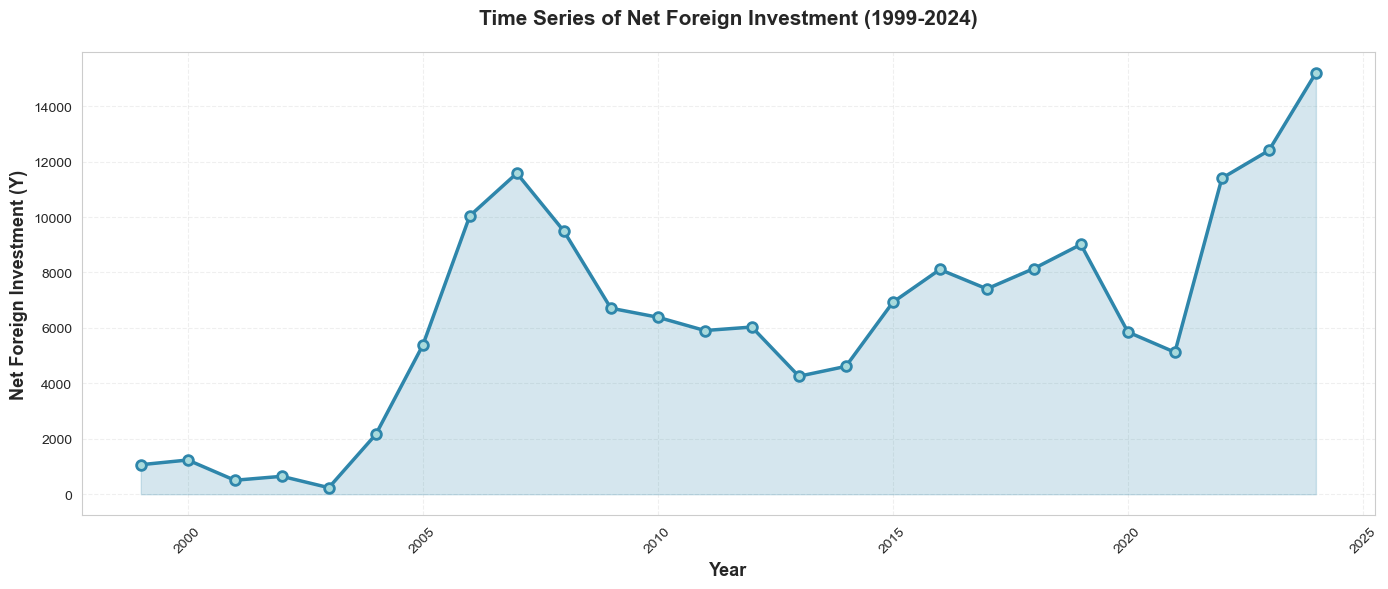

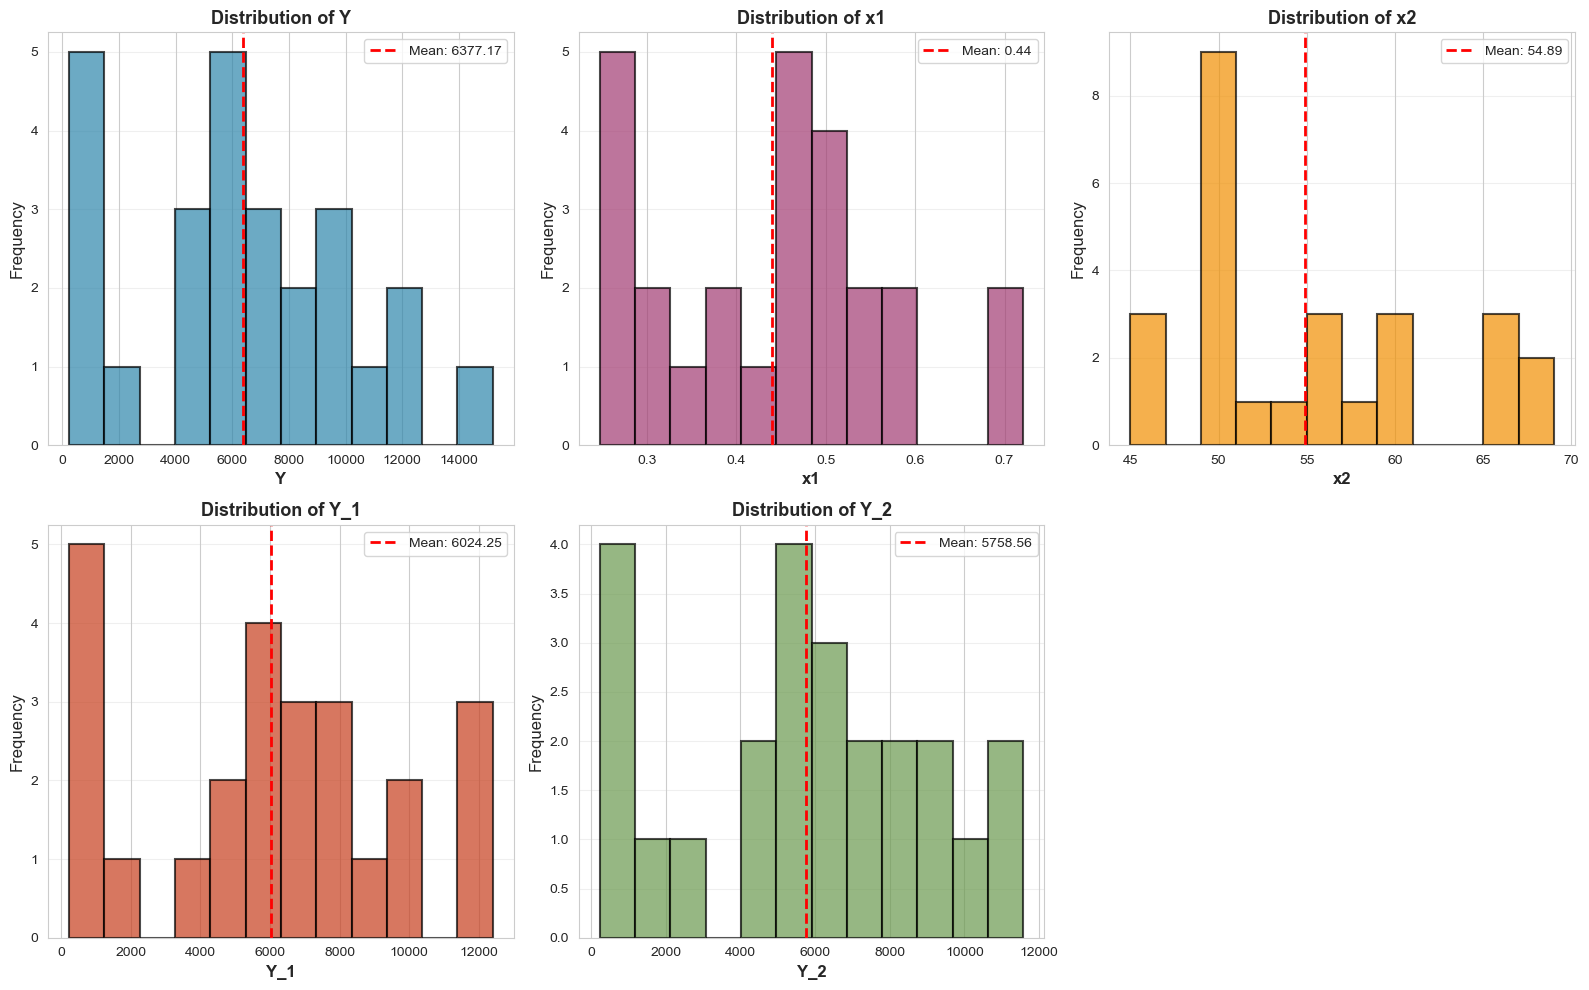

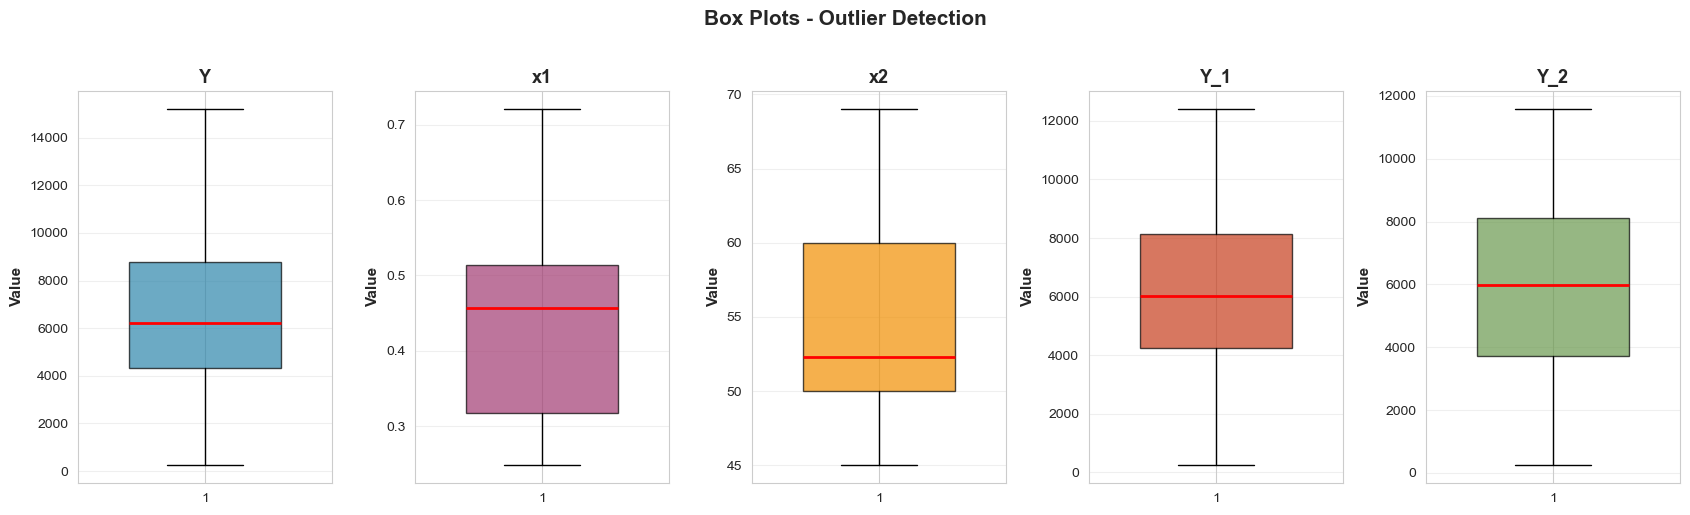

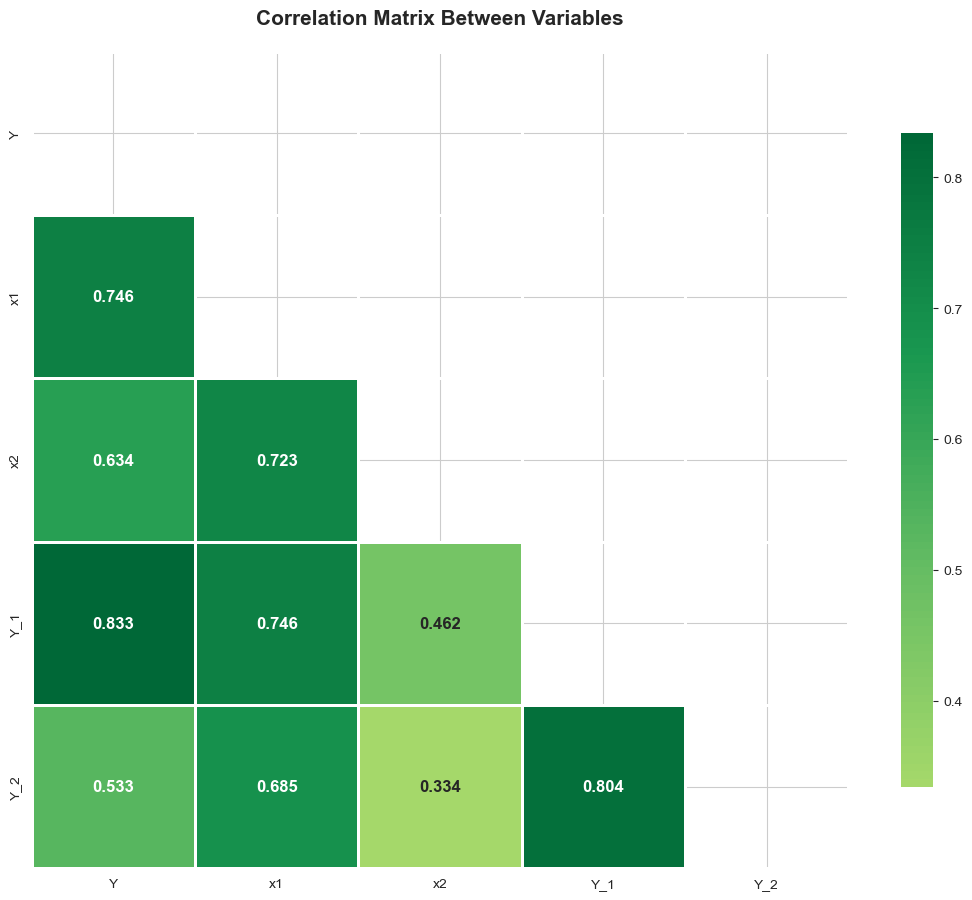

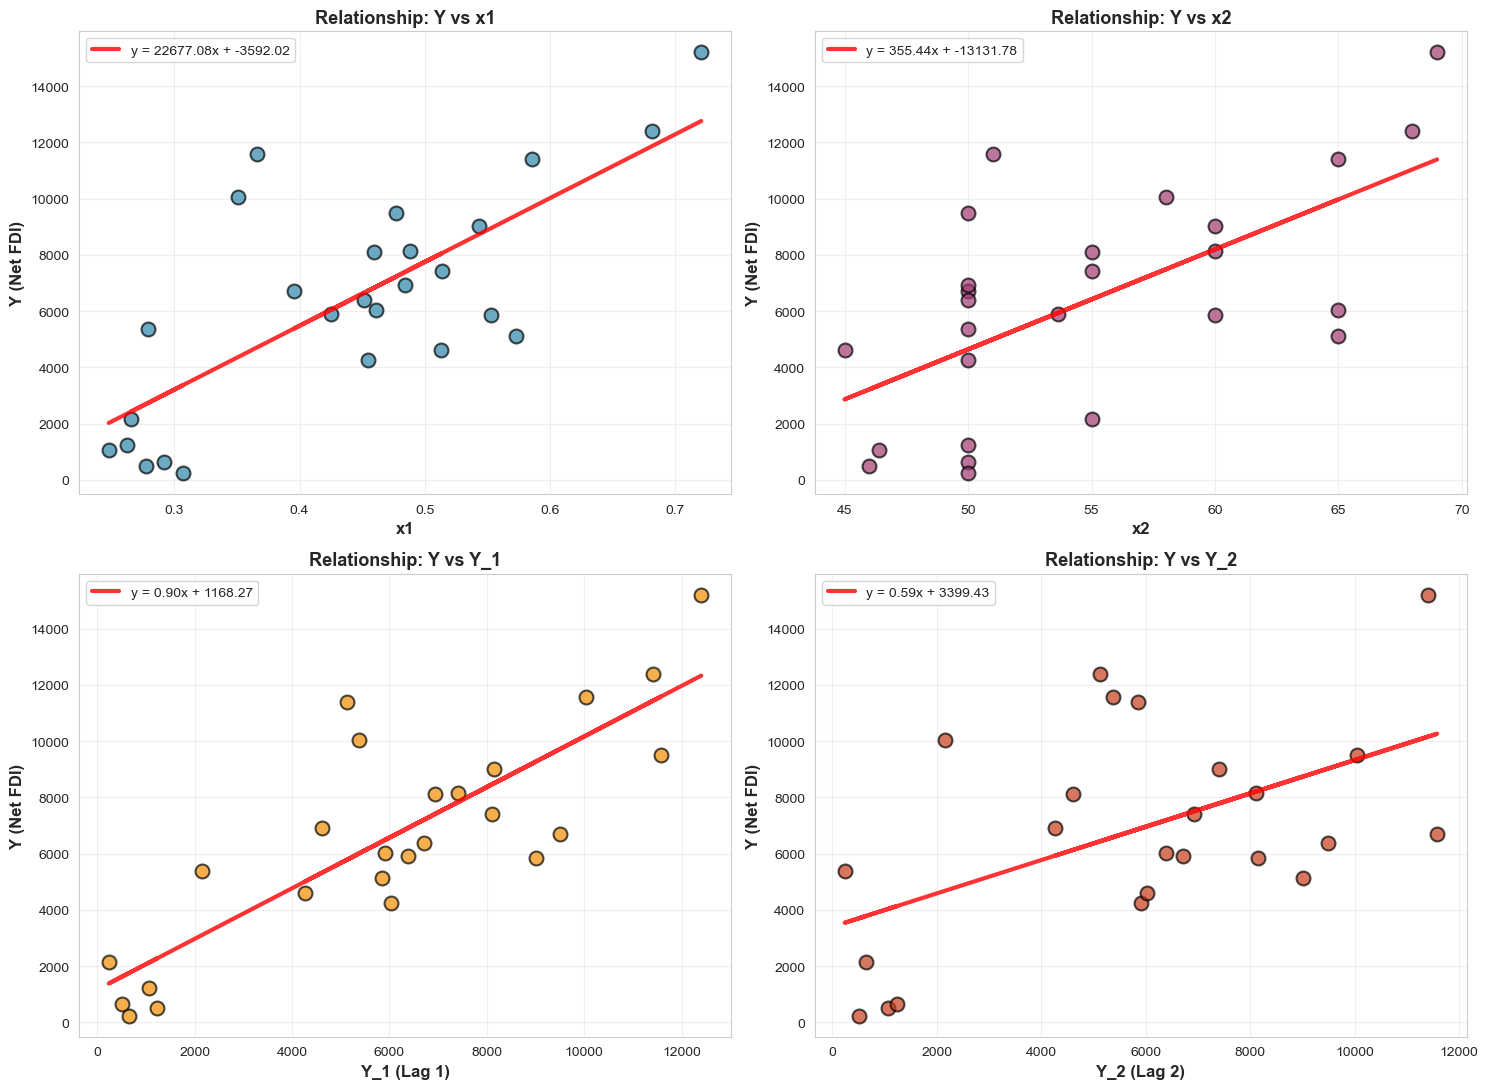

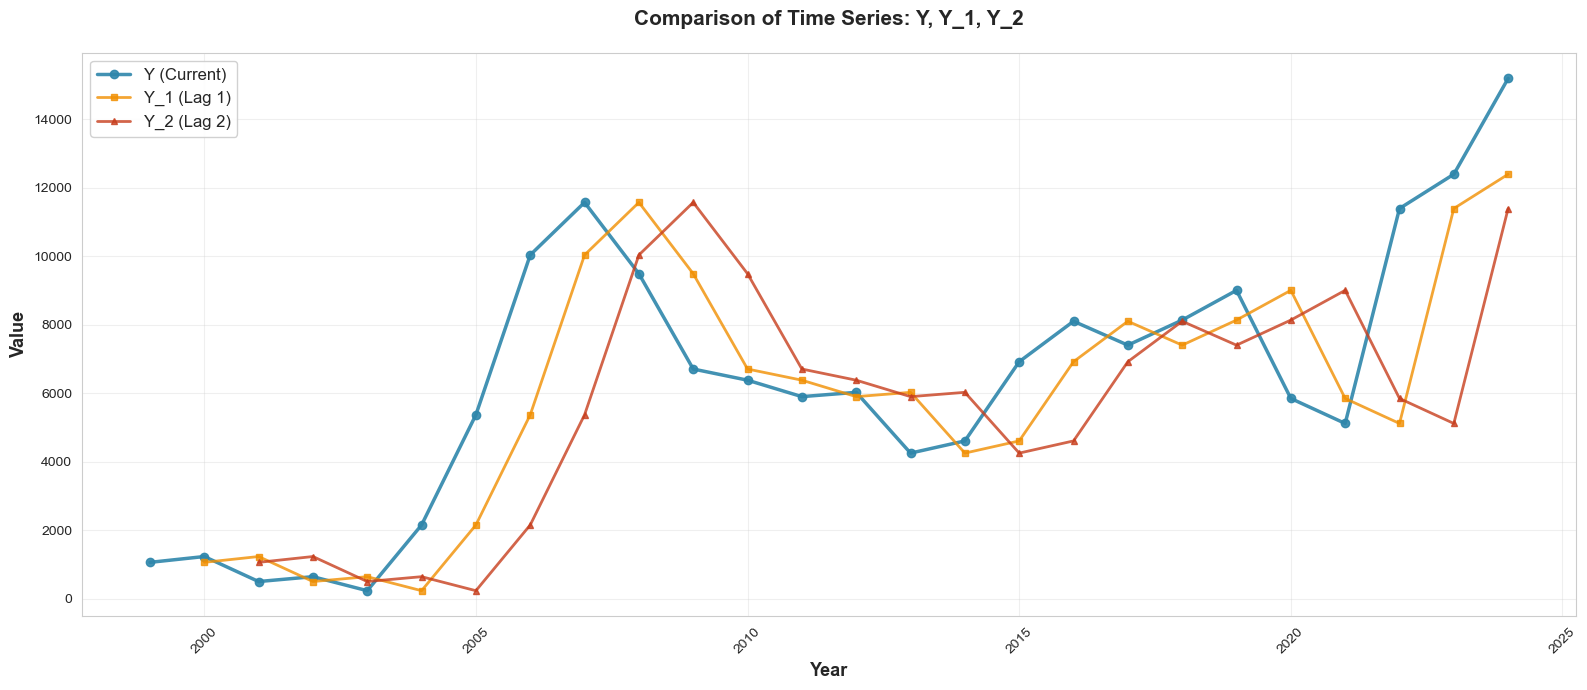


NORMALITY TEST (Shapiro-Wilk)

Y:
  Statistic: 0.9660
  P-value: 0.5223
  ✓ Data follows normal distribution (α=0.05)

x1:
  Statistic: 0.9525
  P-value: 0.2656
  ✓ Data follows normal distribution (α=0.05)

x2:
  Statistic: 0.8956
  P-value: 0.0125
  ✗ Data does NOT follow normal distribution (α=0.05)

CORRELATION ANALYSIS (Pearson)

Correlation between Y and other variables:
  Y vs x1: 0.7456 (p-value: 0.0000, n=26)
    → Significant correlation (α=0.05)
  Y vs x2: 0.6335 (p-value: 0.0005, n=26)
    → Significant correlation (α=0.05)
  Y vs Y_1: 0.8335 (p-value: 0.0000, n=25)
    → Significant correlation (α=0.05)
  Y vs Y_2: 0.5327 (p-value: 0.0074, n=24)
    → Significant correlation (α=0.05)

SUMMARY OF KEY FINDINGS

1. Data Quality:
   - Total observations: 26
   - Missing in Y_1: 1
   - Missing in Y_2: 2

2. Normality (Shapiro-Wilk, α=0.05):
   - Y: Normal (p=0.5223)
   - x1: Normal (p=0.2656)
   - x2: Non-normal (p=0.0125)

3. Correlations with Y:
   - x1: r=0.7456 (Strong)
  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ======================================
# حل مشكلة الخطوط العربية
# ======================================
# استخدام خطوط تدعم العربية
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

# ======================================
# 1. قراءة البيانات من ملف SPSS
# ======================================
print("=" * 60)
print("Reading Data from SPSS File...")
print("=" * 60)

file_path = 'Desktop/data-time series.sav'
df = pd.read_spss(file_path)

print(f"\nData loaded successfully!")
print(f"Number of observations: {len(df)}")
print(f"Number of variables: {len(df.columns)}")
print(f"\nVariable names: {list(df.columns)}")

# ======================================
# 2. Descriptive Statistics
# ======================================
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
print(df.describe())

print("\n" + "=" * 60)
print("FIRST 10 ROWS")
print("=" * 60)
print(df.head(10))

# Check missing values
print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")

# ======================================
# 3. VISUALIZATIONS
# ======================================

# 3.1 Time Series Plot for Y (Main Variable)
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['السنة'], df['Y'], marker='o', linewidth=2.5, markersize=7, 
        color='#2E86AB', markerfacecolor='#A8DADC', markeredgewidth=2)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Net Foreign Investment (Y)', fontsize=13, fontweight='bold')
ax.set_title('Time Series of Net Foreign Investment (1999-2024)', 
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.fill_between(df['السنة'], df['Y'], alpha=0.2, color='#2E86AB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('timeseries_Y.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.2 Distribution Histograms
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
variables = ['Y', 'x1', 'x2', 'Y_1', 'Y_2']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    
    # Remove NaN values for plotting
    data = df[var].dropna()
    
    axes[row, col].hist(data, bins=12, color=colors[idx], alpha=0.7, 
                        edgecolor='black', linewidth=1.5)
    axes[row, col].set_xlabel(var, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Frequency', fontsize=12)
    axes[row, col].set_title(f'Distribution of {var}', fontsize=13, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    
    # Add mean line
    mean_val = data.mean()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', 
                          linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col].legend()

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.3 Box Plots for Outlier Detection
fig, axes = plt.subplots(1, 5, figsize=(17, 5))
for idx, var in enumerate(variables):
    data = df[var].dropna()
    bp = axes[idx].boxplot(data, patch_artist=True, widths=0.6)
    bp['boxes'][0].set_facecolor(colors[idx])
    bp['boxes'][0].set_alpha(0.7)
    bp['medians'][0].set_color('red')
    bp['medians'][0].set_linewidth(2)
    axes[idx].set_ylabel('Value', fontsize=11, fontweight='bold')
    axes[idx].set_title(var, fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Box Plots - Outlier Detection', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.4 Correlation Matrix
correlation_vars = ['Y', 'x1', 'x2', 'Y_1', 'Y_2']
corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(11, 9))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'size': 12, 'weight': 'bold'},
            mask=mask)
plt.title('Correlation Matrix Between Variables', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.5 Scatter Plots with Regression Lines
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Y vs x1
axes[0, 0].scatter(df['x1'], df['Y'], alpha=0.7, s=100, color='#2E86AB', 
                   edgecolors='black', linewidths=1.5)
axes[0, 0].set_xlabel('x1', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Y (Net FDI)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Relationship: Y vs x1', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Regression line
z = np.polyfit(df['x1'], df['Y'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['x1'], p(df['x1']), "r-", alpha=0.8, linewidth=3, 
                label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
axes[0, 0].legend(fontsize=10)

# Y vs x2
axes[0, 1].scatter(df['x2'], df['Y'], alpha=0.7, s=100, color='#A23B72', 
                   edgecolors='black', linewidths=1.5)
axes[0, 1].set_xlabel('x2', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Y (Net FDI)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Relationship: Y vs x2', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

z = np.polyfit(df['x2'], df['Y'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['x2'], p(df['x2']), "r-", alpha=0.8, linewidth=3,
                label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
axes[0, 1].legend(fontsize=10)

# Y vs Y_1 (without NaN)
df_clean = df[['Y', 'Y_1']].dropna()
axes[1, 0].scatter(df_clean['Y_1'], df_clean['Y'], alpha=0.7, s=100, 
                   color='#F18F01', edgecolors='black', linewidths=1.5)
axes[1, 0].set_xlabel('Y_1 (Lag 1)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Y (Net FDI)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Relationship: Y vs Y_1', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

z = np.polyfit(df_clean['Y_1'], df_clean['Y'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df_clean['Y_1'], p(df_clean['Y_1']), "r-", alpha=0.8, linewidth=3,
                label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
axes[1, 0].legend(fontsize=10)

# Y vs Y_2 (without NaN)
df_clean2 = df[['Y', 'Y_2']].dropna()
axes[1, 1].scatter(df_clean2['Y_2'], df_clean2['Y'], alpha=0.7, s=100, 
                   color='#C73E1D', edgecolors='black', linewidths=1.5)
axes[1, 1].set_xlabel('Y_2 (Lag 2)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Y (Net FDI)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Relationship: Y vs Y_2', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

z = np.polyfit(df_clean2['Y_2'], df_clean2['Y'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df_clean2['Y_2'], p(df_clean2['Y_2']), "r-", alpha=0.8, linewidth=3,
                label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
axes[1, 1].legend(fontsize=10)

plt.tight_layout()
plt.savefig('scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.6 Multiple Time Series Comparison
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(df['السنة'], df['Y'], marker='o', linewidth=2.5, 
        label='Y (Current)', markersize=6, alpha=0.9, color='#2E86AB')
ax.plot(df['السنة'], df['Y_1'], marker='s', linewidth=2, 
        label='Y_1 (Lag 1)', markersize=5, alpha=0.8, color='#F18F01')
ax.plot(df['السنة'], df['Y_2'], marker='^', linewidth=2, 
        label='Y_2 (Lag 2)', markersize=5, alpha=0.8, color='#C73E1D')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Value', fontsize=13, fontweight='bold')
ax.set_title('Comparison of Time Series: Y, Y_1, Y_2', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('timeseries_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# 4. Normality Tests
# ======================================
print("\n" + "=" * 60)
print("NORMALITY TEST (Shapiro-Wilk)")
print("=" * 60)

for var in ['Y', 'x1', 'x2']:
    data = df[var].dropna()
    stat, p_value = stats.shapiro(data)
    print(f"\n{var}:")
    print(f"  Statistic: {stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value > 0.05:
        print(f"  ✓ Data follows normal distribution (α=0.05)")
    else:
        print(f"  ✗ Data does NOT follow normal distribution (α=0.05)")

# ======================================
# 5. Correlation Analysis (Fixed)
# ======================================
print("\n" + "=" * 60)
print("CORRELATION ANALYSIS (Pearson)")
print("=" * 60)
print("\nCorrelation between Y and other variables:")

for var in ['x1', 'x2', 'Y_1', 'Y_2']:
    # Remove NaN values before correlation
    df_clean = df[['Y', var]].dropna()
    if len(df_clean) > 2:  # Need at least 3 observations
        corr, p_val = stats.pearsonr(df_clean['Y'], df_clean[var])
        print(f"  Y vs {var}: {corr:.4f} (p-value: {p_val:.4f}, n={len(df_clean)})")
        if p_val < 0.05:
            print(f"    → Significant correlation (α=0.05)")
    else:
        print(f"  Y vs {var}: Not enough data")

# ======================================
# 6. Summary Table
# ======================================
print("\n" + "=" * 60)
print("SUMMARY OF KEY FINDINGS")
print("=" * 60)

print("\n1. Data Quality:")
print(f"   - Total observations: {len(df)}")
print(f"   - Missing in Y_1: {df['Y_1'].isnull().sum()}")
print(f"   - Missing in Y_2: {df['Y_2'].isnull().sum()}")

print("\n2. Normality (Shapiro-Wilk, α=0.05):")
for var in ['Y', 'x1', 'x2']:
    stat, p = stats.shapiro(df[var].dropna())
    status = "Normal" if p > 0.05 else "Non-normal"
    print(f"   - {var}: {status} (p={p:.4f})")

print("\n3. Correlations with Y:")
for var in ['x1', 'x2']:
    corr, p = stats.pearsonr(df['Y'], df[var])
    strength = "Strong" if abs(corr) > 0.7 else ("Moderate" if abs(corr) > 0.4 else "Weak")
    print(f"   - {var}: r={corr:.4f} ({strength})")

print("\n" + "=" * 60)
print("Analysis completed successfully! ✓")
print("All charts saved as PNG files.")
print("=" * 60)

ADVANCED TIME SERIES ANALYSIS & CHARTS

1. Creating ACF and PACF plots...


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 13.

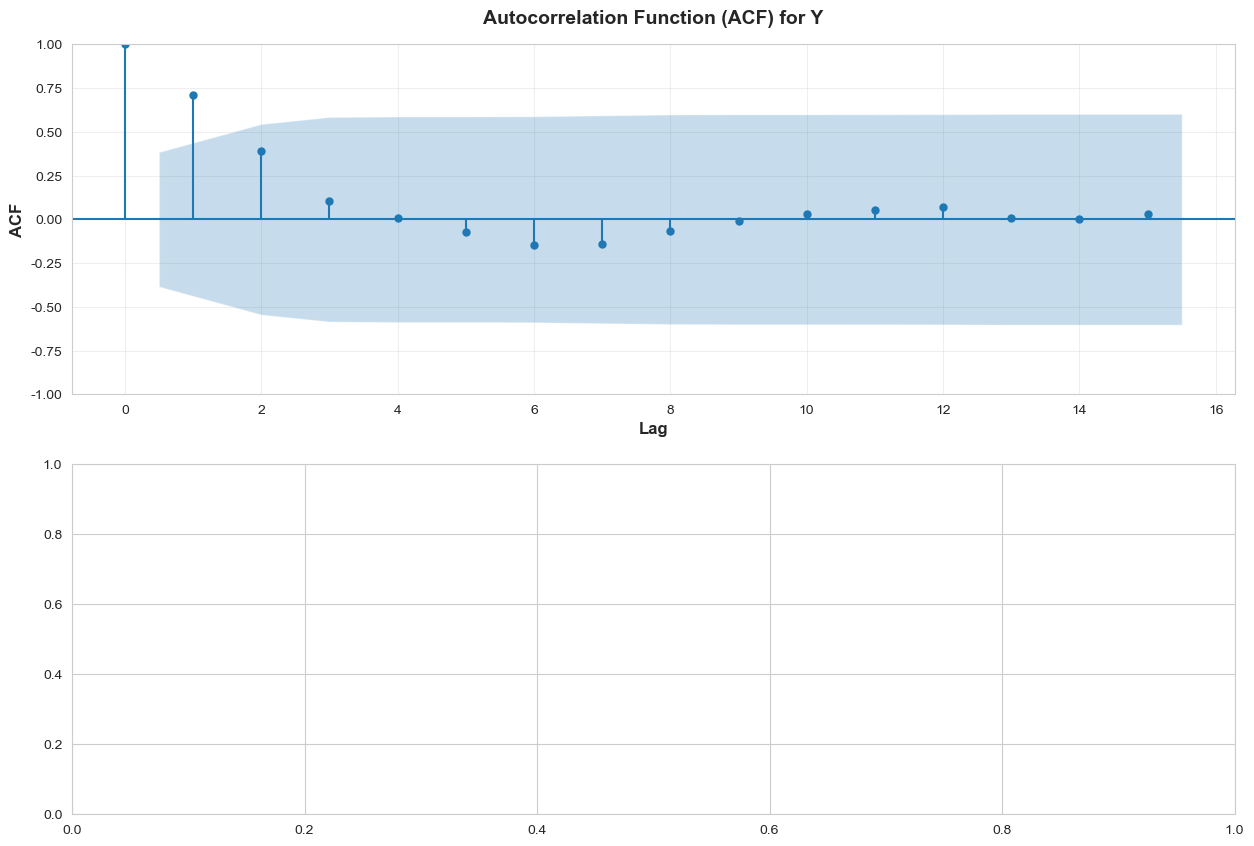

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Setup
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# Read data
file_path = 'Desktop/data-time series.sav'
df = pd.read_spss(file_path)

# Set year as index for time series analysis
df_ts = df.set_index('السنة')

print("=" * 70)
print("ADVANCED TIME SERIES ANALYSIS & CHARTS")
print("=" * 70)

# ======================================
# CHART 1: ACF & PACF Analysis
# ======================================
print("\n1. Creating ACF and PACF plots...")

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# ACF Plot
plot_acf(df['Y'].dropna(), lags=15, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) for Y', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Lag', fontsize=12, fontweight='bold')
axes[0].set_ylabel('ACF', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# PACF Plot
plot_pacf(df['Y'].dropna(), lags=15, ax=axes[1], alpha=0.05)
axes[1].set_title('Partial Autocorrelation Function (PACF) for Y', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Lag', fontsize=12, fontweight='bold')
axes[1].set_ylabel('PACF', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('acf_pacf_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# CHART 2: Trend Analysis with Moving Averages
# ======================================
print("\n2. Creating trend analysis with moving averages...")

fig, ax = plt.subplots(figsize=(16, 7))

# Original series
ax.plot(df['السنة'], df['Y'], marker='o', linewidth=2, 
        label='Original Data', color='#2E86AB', alpha=0.7, markersize=6)

# Moving averages
ma3 = df['Y'].rolling(window=3, center=True).mean()
ma5 = df['Y'].rolling(window=5, center=True).mean()
ma7 = df['Y'].rolling(window=7, center=True).mean()

ax.plot(df['السنة'], ma3, linewidth=2.5, label='MA(3)', 
        color='#F18F01', alpha=0.8)
ax.plot(df['السنة'], ma5, linewidth=2.5, label='MA(5)', 
        color='#C73E1D', alpha=0.8)
ax.plot(df['السنة'], ma7, linewidth=2.5, label='MA(7)', 
        color='#6A994E', alpha=0.8)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Net Foreign Investment (Y)', fontsize=13, fontweight='bold')
ax.set_title('Trend Analysis: Moving Averages Comparison', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('moving_averages.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# CHART 3: Growth Rate Analysis
# ======================================
print("\n3. Creating growth rate analysis...")

# Calculate growth rates
growth_rate = df['Y'].pct_change() * 100

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Growth rate over time
axes[0].bar(df['السنة'][1:], growth_rate[1:], color='#2E86AB', 
           alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Year-over-Year Growth Rate of FDI', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Cumulative growth
cumulative = (df['Y'] / df['Y'].iloc[0] - 1) * 100
axes[1].fill_between(df['السنة'], cumulative, alpha=0.3, color='#2E86AB')
axes[1].plot(df['السنة'], cumulative, marker='o', linewidth=2.5, 
            color='#2E86AB', markersize=6)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Growth (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Growth Since 1999', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('growth_rate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# CHART 4: Residuals Analysis
# ======================================
print("\n4. Creating residuals analysis...")

# Simple linear trend
from sklearn.linear_model import LinearRegression

X = df['time'].values.reshape(-1, 1)
y = df['Y'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Residuals over time
axes[0, 0].scatter(df['السنة'], residuals, s=100, alpha=0.7, 
                   color='#2E86AB', edgecolors='black', linewidths=1.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Residuals Over Time', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Histogram of residuals
axes[0, 1].hist(residuals, bins=12, color='#2E86AB', alpha=0.7, 
               edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Test)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Fitted
axes[1, 1].scatter(y_pred, residuals, s=100, alpha=0.7, 
                   color='#2E86AB', edgecolors='black', linewidths=1.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Fitted Values', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Residuals vs Fitted Values', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# CHART 5: Volatility Analysis
# ======================================
print("\n5. Creating volatility analysis...")

# Rolling standard deviation
rolling_std_3 = df['Y'].rolling(window=3).std()
rolling_std_5 = df['Y'].rolling(window=5).std()

fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(df['السنة'], rolling_std_3, linewidth=2.5, 
        label='Rolling SD (3 years)', color='#F18F01', marker='o', markersize=5)
ax.plot(df['السنة'], rolling_std_5, linewidth=2.5, 
        label='Rolling SD (5 years)', color='#C73E1D', marker='s', markersize=5)
ax.fill_between(df['السنة'], rolling_std_3, alpha=0.2, color='#F18F01')
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Standard Deviation', fontsize=13, fontweight='bold')
ax.set_title('Volatility Analysis: Rolling Standard Deviation', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# CHART 6: Comparative Analysis (All Variables)
# ======================================
print("\n6. Creating comparative time series...")

# Normalize data for comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

variables_to_plot = ['Y', 'x1', 'x2']
df_normalized = df[variables_to_plot].copy()
df_normalized[variables_to_plot] = scaler.fit_transform(df_normalized[variables_to_plot])

fig, ax = plt.subplots(figsize=(16, 7))
colors = ['#2E86AB', '#A23B72', '#F18F01']
markers = ['o', 's', '^']

for idx, var in enumerate(variables_to_plot):
    ax.plot(df['السنة'], df_normalized[var], linewidth=2.5, 
           label=f'{var} (normalized)', color=colors[idx], 
           marker=markers[idx], markersize=6, alpha=0.8)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Normalized Values (Z-score)', fontsize=13, fontweight='bold')
ax.set_title('Normalized Comparison: Y, x1, x2', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('normalized_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# CHART 7: Stationarity Test Visualization
# ======================================
print("\n7. Creating stationarity analysis...")

# ADF test
adf_result = adfuller(df['Y'].dropna())

# First difference
y_diff = df['Y'].diff().dropna()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Original series
axes[0].plot(df['السنة'], df['Y'], linewidth=2.5, 
            color='#2E86AB', marker='o', markersize=6)
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Y (Original)', fontsize=12, fontweight='bold')
axes[0].set_title(f'Original Series - ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Check if stationary
if adf_result[1] < 0.05:
    axes[0].text(0.5, 0.95, '✓ STATIONARY (p < 0.05)', 
                transform=axes[0].transAxes, fontsize=11, 
                verticalalignment='top', horizontalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
else:
    axes[0].text(0.5, 0.95, '✗ NON-STATIONARY (p ≥ 0.05)', 
                transform=axes[0].transAxes, fontsize=11, 
                verticalalignment='top', horizontalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# First difference
adf_diff = adfuller(y_diff)
axes[1].plot(df['السنة'][1:], y_diff, linewidth=2.5, 
            color='#C73E1D', marker='o', markersize=6)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.5)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('First Difference of Y', fontsize=12, fontweight='bold')
axes[1].set_title(f'First Difference - ADF Statistic: {adf_diff[0]:.4f}, p-value: {adf_diff[1]:.4f}', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

if adf_diff[1] < 0.05:
    axes[1].text(0.5, 0.95, '✓ STATIONARY after differencing', 
                transform=axes[1].transAxes, fontsize=11, 
                verticalalignment='top', horizontalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('stationarity_test.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================================
# Statistical Tests Summary
# ======================================
print("\n" + "=" * 70)
print("STATISTICAL TESTS SUMMARY")
print("=" * 70)

# ADF Test
print("\n1. Augmented Dickey-Fuller Test (Stationarity):")
print(f"   ADF Statistic: {adf_result[0]:.4f}")
print(f"   P-value: {adf_result[1]:.4f}")
print(f"   Critical Values:")
for key, value in adf_result[4].items():
    print(f"     {key}: {value:.4f}")
if adf_result[1] < 0.05:
    print("   → Series is STATIONARY")
else:
    print("   → Series is NON-STATIONARY (needs differencing)")

# KPSS Test
try:
    kpss_result = kpss(df['Y'].dropna(), regression='c')
    print(f"\n2. KPSS Test (Stationarity):")
    print(f"   KPSS Statistic: {kpss_result[0]:.4f}")
    print(f"   P-value: {kpss_result[1]:.4f}")
    if kpss_result[1] > 0.05:
        print("   → Series is STATIONARY")
    else:
        print("   → Series is NON-STATIONARY")
except:
    print("\n2. KPSS Test: Not enough observations")

print("\n" + "=" * 70)
print("All advanced charts saved successfully! ✓")
print("=" * 70)
print("\nGenerated files:")
print("  1. acf_pacf_analysis.png")
print("  2. moving_averages.png")
print("  3. growth_rate_analysis.png")
print("  4. residuals_analysis.png")
print("  5. volatility_analysis.png")
print("  6. normalized_comparison.png")
print("  7. stationarity_test.png")

Reading Data from SPSS File...

Data loaded successfully!
Number of observations: 26
Number of variables: 7

Variable names: ['السنة', 'Y', 'time', 'x1', 'x2', 'Y_1', 'Y_2']

DESCRIPTIVE STATISTICS
             السنة             Y       time         x1         x2  \
count    26.000000     26.000000  26.000000  26.000000  26.000000   
mean   2011.500000   6377.168162  13.500000   0.439615  54.886136   
std       7.648529   3961.621820   7.648529   0.130258   7.060958   
min    1999.000000    237.400000   1.000000   0.247598  45.000000   
25%    2005.250000   4345.000000   7.250000   0.317896  50.000000   
50%    2011.500000   6208.300000  13.500000   0.457095  52.318182   
75%    2017.750000   8792.825000  19.750000   0.513716  60.000000   
max    2024.000000  15200.000000  26.000000   0.721000  69.000000   

                Y_1           Y_2  
count     25.000000     24.000000  
mean    6024.254888   5758.561342  
std     3602.112401   3420.203996  
min      237.400000    237.400000  


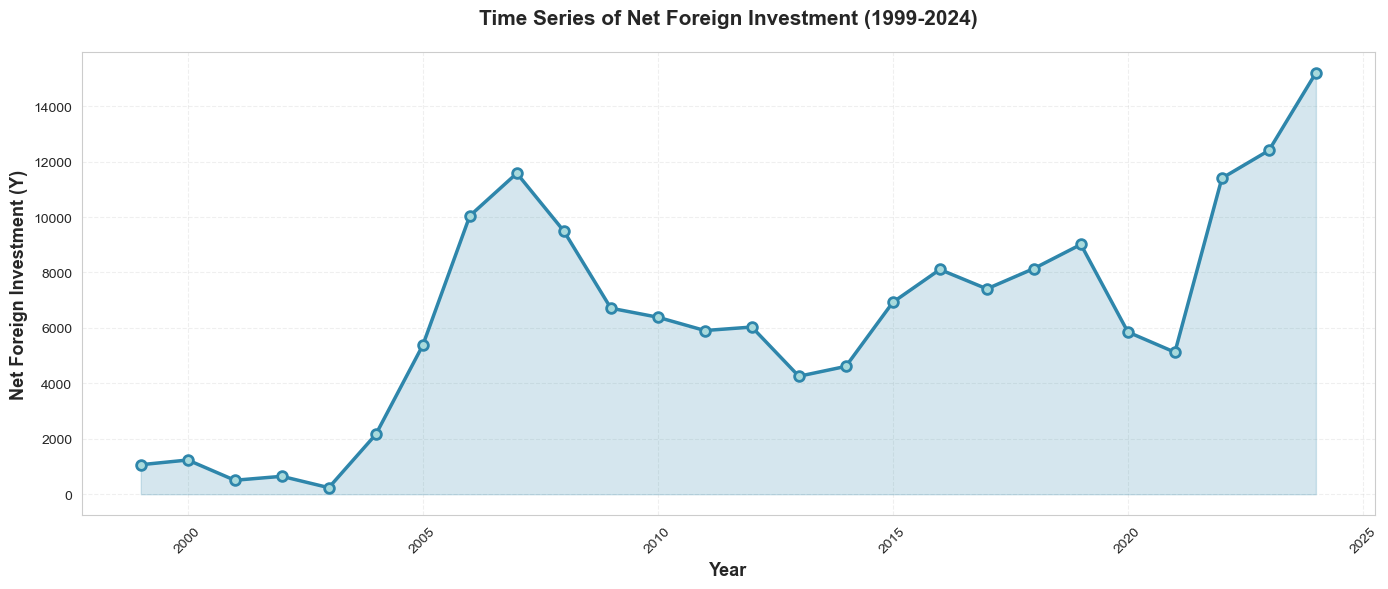

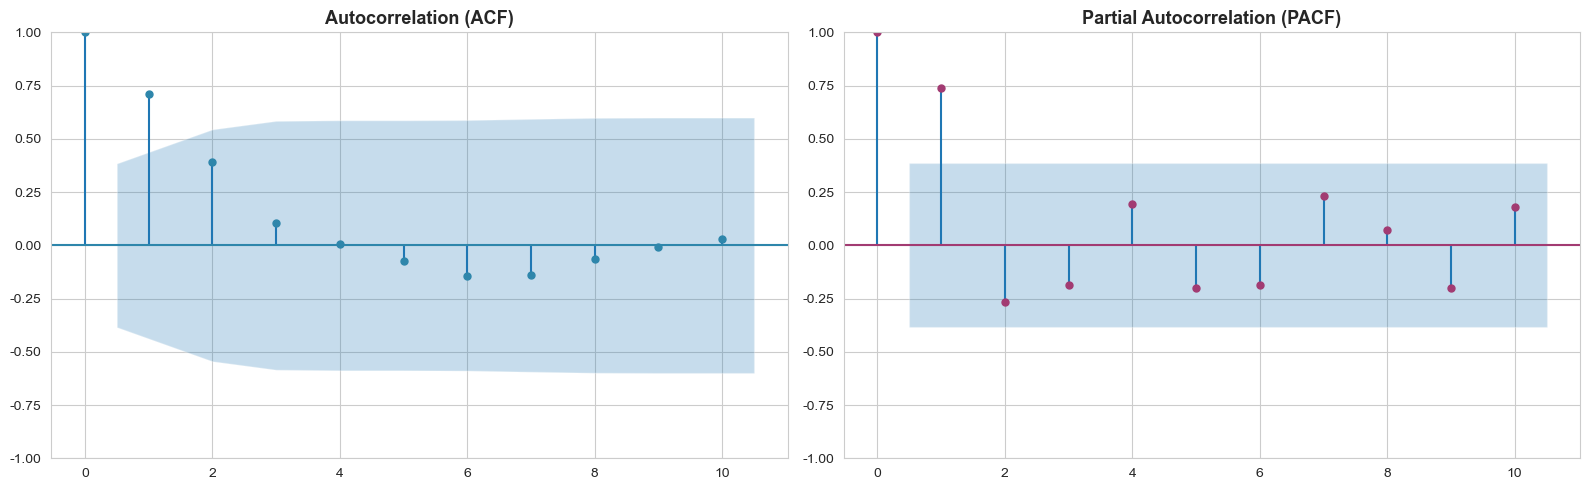

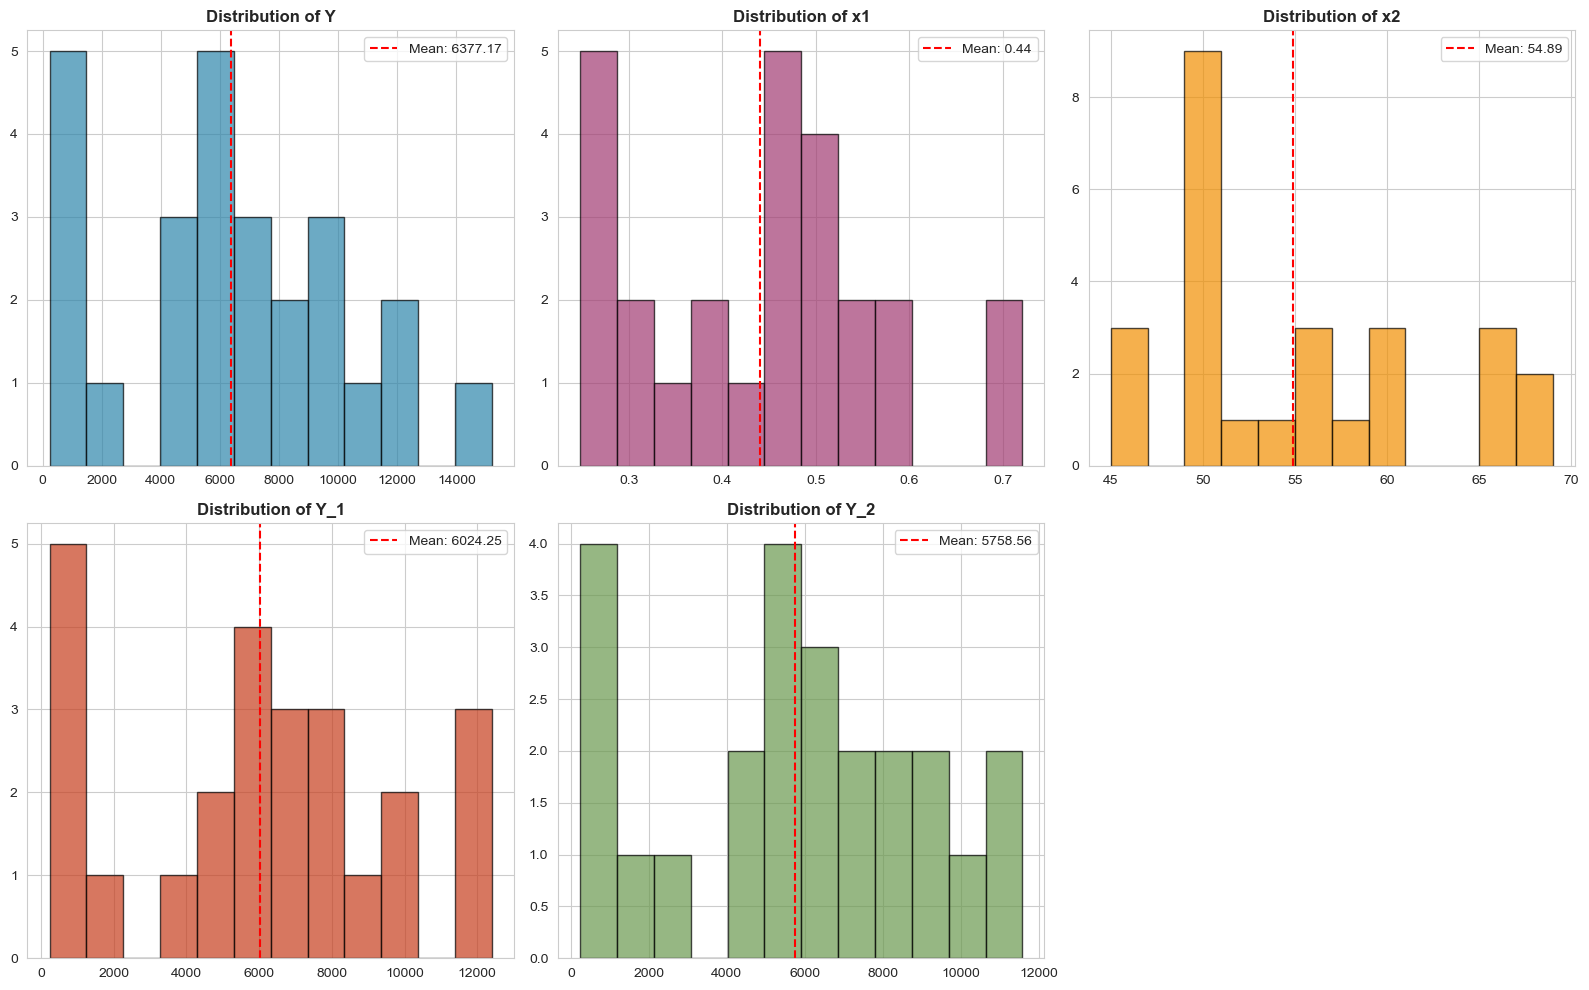

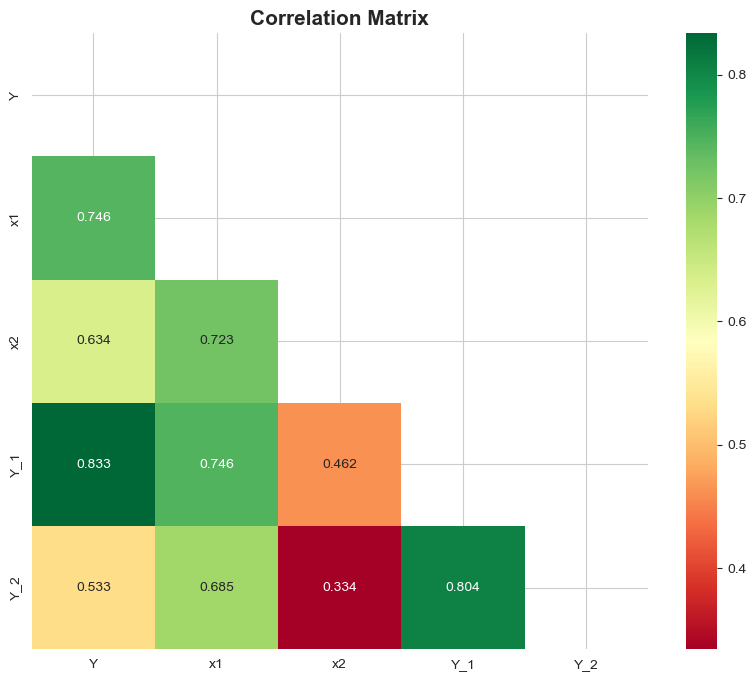


STATISTICAL TESTS

[Normality Test - Shapiro-Wilk]
Y: p-value = 0.5223 (Normal)
x1: p-value = 0.2656 (Normal)
x2: p-value = 0.0125 (Non-normal)

[Correlation Analysis with Y]
Y vs x1: r = 0.7456, p = 0.0000
Y vs x2: r = 0.6335, p = 0.0005
Y vs Y_1: r = 0.8335, p = 0.0000
Y vs Y_2: r = 0.5327, p = 0.0074

Analysis completed successfully! ✓


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings('ignore')

# ======================================
# إعدادات الرسوم البيانية والخطوط
# ======================================
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

# ======================================
# 1. قراءة البيانات من ملف SPSS
# ======================================
print("=" * 60)
print("Reading Data from SPSS File...")
print("=" * 60)

# تأكد من أن المسار صحيح في جهازك
file_path = 'Desktop/data-time series.sav'
try:
    df = pd.read_spss(file_path)
    print(f"\nData loaded successfully!")
    print(f"Number of observations: {len(df)}")
    print(f"Number of variables: {len(df.columns)}")
    print(f"\nVariable names: {list(df.columns)}")
except Exception as e:
    print(f"Error loading file: {e}")

# ======================================
# 2. الإحصاء الوصفي (Descriptive Statistics)
# ======================================
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
print(df.describe())

# التحقق من القيم المفقودة
print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")

# ======================================
# 3. الرسوم البيانية (VISUALIZATIONS)
# ======================================

# 3.1 رسم السلسلة الزمنية لـ Y
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['السنة'], df['Y'], marker='o', linewidth=2.5, markersize=7, 
        color='#2E86AB', markerfacecolor='#A8DADC', markeredgewidth=2)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Net Foreign Investment (Y)', fontsize=13, fontweight='bold')
ax.set_title('Time Series of Net Foreign Investment (1999-2024)', 
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.fill_between(df['السنة'], df['Y'], alpha=0.2, color='#2E86AB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('timeseries_Y.png', dpi=300)
plt.show()

# 3.2 رسم ACF و PACF (الجزء الذي تم إصلاحه)
# تم تحديد lags=10 لأن حجم البيانات صغير (حوالي 25 سنة)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(df['Y'].dropna(), lags=10, ax=axes[0], color='#2E86AB')
axes[0].set_title('Autocorrelation (ACF)', fontsize=13, fontweight='bold')

# استخدام lags=10 لتجنب ValueError (يجب أن يكون أقل من 50% من حجم العينة)
plot_pacf(df['Y'].dropna(), lags=10, ax=axes[1], color='#A23B72', method='yw')
axes[1].set_title('Partial Autocorrelation (PACF)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('acf_pacf.png', dpi=300)
plt.show()

# 3.3 الهيستوجرام (Distribution Histograms)
variables = ['Y', 'x1', 'x2', 'Y_1', 'Y_2']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for idx, var in enumerate(variables):
    row, col = idx // 3, idx % 3
    data = df[var].dropna()
    axes[row, col].hist(data, bins=12, color=colors[idx], alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {var}', fontweight='bold')
    mean_val = data.mean()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row, col].legend()

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.savefig('distributions.png', dpi=300)
plt.show()

# 3.4 مصفوفة الارتباط (Correlation Matrix)
plt.figure(figsize=(10, 8))
corr_matrix = df[variables].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', mask=mask, fmt='.3f', square=True)
plt.title('Correlation Matrix', fontsize=15, fontweight='bold')
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

# ======================================
# 4. الاختبارات الإحصائية (Normality & Correlation)
# ======================================
print("\n" + "=" * 60)
print("STATISTICAL TESTS")
print("=" * 60)

# اختبار الطبيعية
print("\n[Normality Test - Shapiro-Wilk]")
for var in ['Y', 'x1', 'x2']:
    stat, p = stats.shapiro(df[var].dropna())
    result = "Normal" if p > 0.05 else "Non-normal"
    print(f"{var}: p-value = {p:.4f} ({result})")

# تحليل الارتباط بيرسون
print("\n[Correlation Analysis with Y]")
for var in ['x1', 'x2', 'Y_1', 'Y_2']:
    df_c = df[['Y', var]].dropna()
    if len(df_c) > 2:
        r, p = stats.pearsonr(df_c['Y'], df_c[var])
        print(f"Y vs {var}: r = {r:.4f}, p = {p:.4f}")

print("\n" + "=" * 60)
print("Analysis completed successfully! ✓")
print("=" * 60)

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# 1. بناء نموذج الانحدار المتعدد المقترح (بناءً على الارتباطات القوية التي ظهرت)
# سنستخدم Y كمتغير تابع و x1 و Y_1 كمتغيرات مستقلة (لأن ارتباطهم هو الأعلى)
df_model = df[['Y', 'x1', 'Y_1']].dropna()
X = df_model[['x1', 'Y_1']]
X = sm.add_constant(X) # إضافة الثابت
y = df_model['Y']

model = sm.OLS(y, X).fit()

print("\n" + "="*60)
print("PROPOSED STATISTICAL MODEL (Regression Results)")
print("="*60)
print(model.summary())

# 2. التنبؤ بالقيم المستقبلية (Forecasting)
# لنفترض أننا نريد التنبؤ لعام 2025 بناءً على اتجاه البيانات
history = list(df['Y'].dropna().values)
arima_model = ARIMA(history, order=(1,1,0)) # نموذج ARIMA بسيط يناسب حجم بياناتك
arima_result = arima_model.fit()
forecast = arima_result.forecast(steps=2)

print("\n" + "="*60)
print("FUTURE FORECASTS")
print("="*60)
print(f"Predicted Net Investment for 2025: {forecast[0]:.2f}")
print(f"Predicted Net Investment for 2026: {forecast[1]:.2f}")


PROPOSED STATISTICAL MODEL (Regression Results)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     27.99
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           9.00e-07
Time:                        15:50:49   Log-Likelihood:                -225.79
No. Observations:                  25   AIC:                             457.6
Df Residuals:                      22   BIC:                             461.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

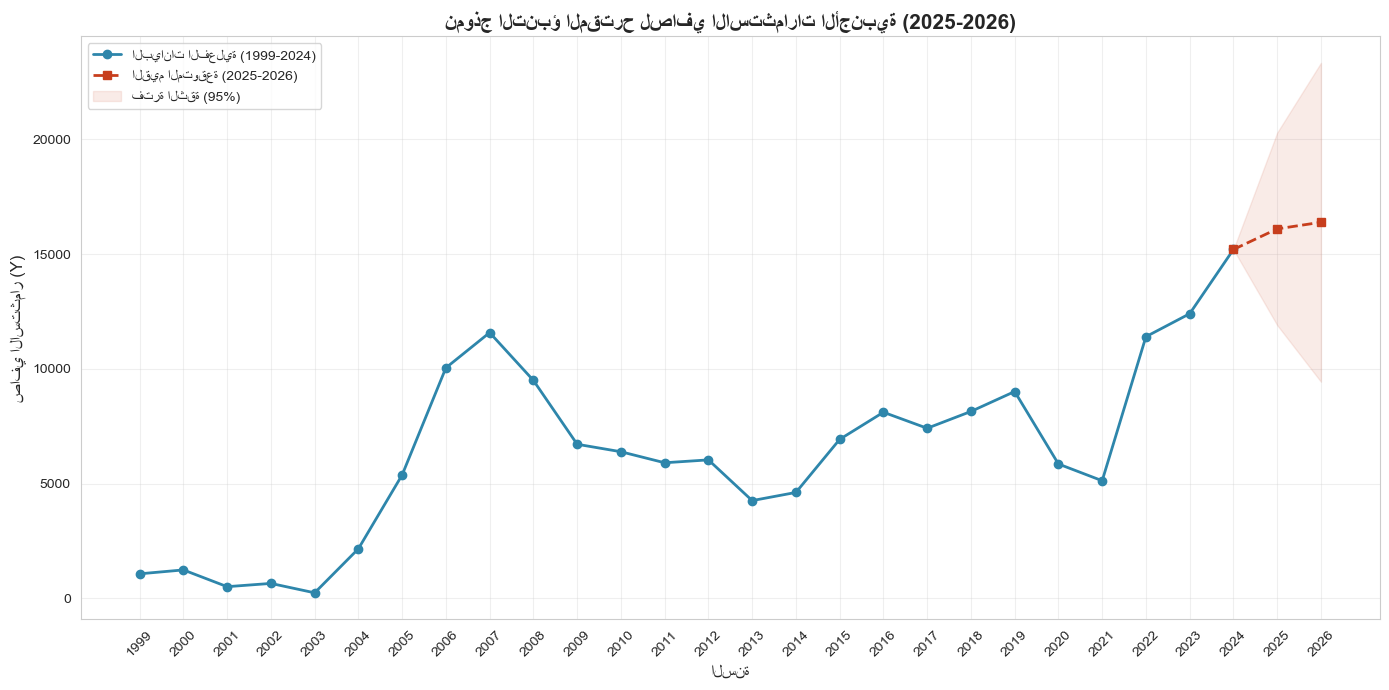

KeyError: 0

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1. تجهيز البيانات والتنبؤ
history = df['Y'].dropna()
years = df['السنة'].dropna()

# بناء نموذج ARIMA (استخدمنا رتبة 1,1,0 بناءً على تحليل PACF السابق)
model_arima = ARIMA(history, order=(1,1,0))
results_arima = model_arima.fit()

# التنبؤ لخطوتين (2025 و 2026) مع الحصول على فترة الثقة
forecast_steps = 2
forecast_res = results_arima.get_forecast(steps=forecast_steps)
forecast_values = forecast_res.predicted_mean
confidence_intervals = forecast_res.conf_int()

# تجهيز السنوات المستقبلية
future_years = [years.iloc[-1] + 1, years.iloc[-1] + 2]

# 2. رسم التنبؤ بشكل احترافي
plt.figure(figsize=(14, 7))

# رسم البيانات التاريخية
plt.plot(years, history, marker='o', label='البيانات الفعلية (1999-2024)', color='#2E86AB', linewidth=2)

# رسم خط التنبؤ (يبدأ من آخر نقطة فعلية ليصل للمستقبل)
last_year = years.iloc[-1]
last_val = history.iloc[-1]
all_pred_years = [last_year] + list(future_years)
all_pred_vals = [last_val] + list(forecast_values)

plt.plot(all_pred_years, all_pred_vals, marker='s', linestyle='--', 
         label='القيم المتوقعة (2025-2026)', color='#C73E1D', linewidth=2)

# رسم منطقة الشك أو فترة الثقة (Confidence Interval)
lower_limits = [last_val] + list(confidence_intervals.iloc[:, 0])
upper_limits = [last_val] + list(confidence_intervals.iloc[:, 1])
plt.fill_between(all_pred_years, lower_limits, upper_limits, color='#C73E1D', alpha=0.1, label='فترة الثقة (95%)')

# إعدادات الرسم
plt.title('نموذج التنبؤ المقترح لصافي الاستثمارات الأجنبية (2025-2026)', fontsize=15, fontweight='bold')
plt.xlabel('السنة', fontsize=12)
plt.ylabel('صافي الاستثمار (Y)', fontsize=12)
plt.xticks(list(years) + future_years, rotation=45)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('investment_forecast.png', dpi=300)
plt.show()

# طباعة القيم للتأكد
print(f"توقع عام 2025: {forecast_values[0]:.2f}")
print(f"توقع عام 2026: {forecast_values[1]:.2f}")

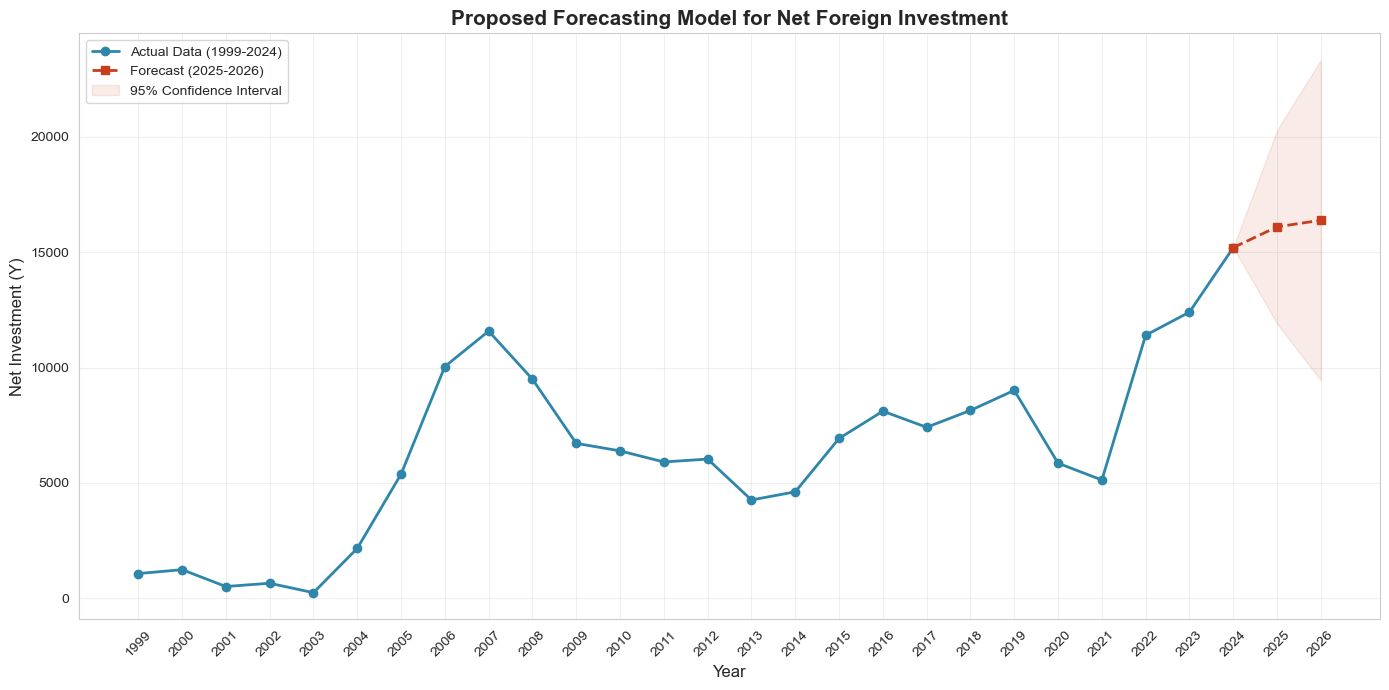

توقع عام 2025: 16097.67
توقع عام 2026: 16385.55


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1. بناء النموذج والتنبؤ
history = df['Y'].dropna()
years = df['السنة'].dropna()

model_arima = ARIMA(history, order=(1,1,0))
results_arima = model_arima.fit()

# التنبؤ
forecast_steps = 2
forecast_res = results_arima.get_forecast(steps=forecast_steps)
forecast_values = forecast_res.predicted_mean
confidence_intervals = forecast_res.conf_int()

# استخراج القيم بشكل آمن باستخدام .iloc لتجنب KeyError
val_2025 = forecast_values.iloc[0]
val_2026 = forecast_values.iloc[1]

# تجهيز السنوات المستقبلية
future_years = [years.iloc[-1] + 1, years.iloc[-1] + 2]

# 2. الرسم البياني للتنبؤ
plt.figure(figsize=(14, 7))

# رسم البيانات التاريخية
plt.plot(years, history, marker='o', label='Actual Data (1999-2024)', color='#2E86AB', linewidth=2)

# تجهيز نقاط رسم خط التنبؤ
all_pred_years = [years.iloc[-1]] + list(future_years)
all_pred_vals = [history.iloc[-1]] + [val_2025, val_2026]

plt.plot(all_pred_years, all_pred_vals, marker='s', linestyle='--', 
         label='Forecast (2025-2026)', color='#C73E1D', linewidth=2)

# رسم فترة الثقة
lower_limits = [history.iloc[-1]] + list(confidence_intervals.iloc[:, 0])
upper_limits = [history.iloc[-1]] + list(confidence_intervals.iloc[:, 1])
plt.fill_between(all_pred_years, lower_limits, upper_limits, color='#C73E1D', alpha=0.1, label='95% Confidence Interval')

plt.title('Proposed Forecasting Model for Net Foreign Investment', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Investment (Y)', fontsize=12)
plt.xticks(list(years) + future_years, rotation=45)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('investment_forecast.png', dpi=300)
plt.show()

print(f"توقع عام 2025: {val_2025:.2f}")
print(f"توقع عام 2026: {val_2026:.2f}")
